In [366]:
import pandas as pd
from sklearn.datasets import load_iris # differentiate between three types of iris flowers based on l and b of their petals
iris = load_iris()

In [367]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [368]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

lets convert the data into a proper dataframe

In [369]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [370]:
df['target'] = iris.target # append the target column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [371]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

As you can see the target_names above, we can deduce that setosa =0, versicolor = 1, virginica =2

In [372]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [373]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


From the above data we conlude that target 0 is from the 0 to 49, 1 is from 50 to 99 and 2 from 100 to 150. Lets add the names in our data frame too.

In [374]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x]) 
# this means that a new column will be added to our data set and the
# target_names form iris will take x as inputs which are taken from
# the target column i.e. 0,1 and 2 and adjecent names will be placed 
# in the new created column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [375]:
from matplotlib import pyplot as plt

seperate the dataframes in three parts according to target

In [376]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

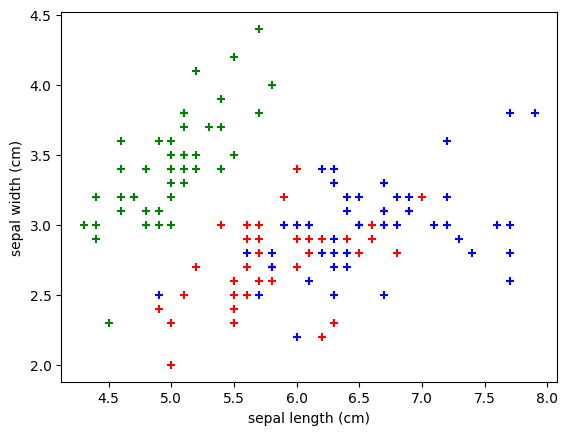

In [377]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='+')

It seems that is easy to classify between green and red but difficult between red and blue, it is easier using petal dimensions, but the svd combines all the 4 coumns into 4d data which we cannot visualize but it can and it serates them

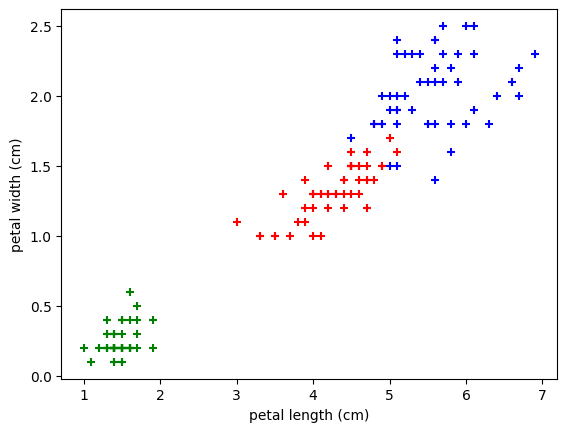

In [378]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='+')

In [379]:
from sklearn.model_selection import train_test_split

x= df.drop(['target','flower_name'],axis='columns')
y= df.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [380]:
len(x_train)

120

In [381]:
len(x_test)

30

In [382]:
from sklearn.svm import SVC
model = SVC(C=1)   
# the model is svm model, we can try to change the 
# value of c i.e. regularisation to increase or decrease the accuracy or performance
# we can also change other parameters such as gamma or kernel to tune

In [383]:
model.fit(x_train, y_train)

SVC(C=1)

sometimes the score is 1 sometimes less

In [384]:
model.score(x_test, y_test)

1.0